In [32]:
!pip install tensorflow

In [33]:
#import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np

In [35]:
!pip install opencv-python

In [36]:
import cv2

In [37]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 280s 2us/step


In [38]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [39]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [40]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

In [41]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model=RandomForestClassifier()

In [54]:
model.fit(x_train2,y_train)
y_pred=model.predict(x_test2)
y_pred

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2644\2481298370.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train2,y_train)


array([6, 8, 8, ..., 5, 5, 7], dtype=uint8)

In [55]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55      1046
           1       0.55      0.52      0.53      1066
           2       0.33      0.36      0.35       919
           3       0.25      0.31      0.27       806
           4       0.41      0.43      0.42       964
           5       0.38      0.41      0.40       928
           6       0.56      0.47      0.52      1190
           7       0.46      0.52      0.49       898
           8       0.62      0.59      0.61      1038
           9       0.55      0.48      0.52      1145

    accuracy                           0.47     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.48      0.47      0.47     10000



In [56]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[564,  43, 107,  61,  52,  32,  13,  38,  87,  49],
       [ 37, 552,  41,  47,  24,  37,  35,  46,  93, 154],
       [ 60,  16, 333,  87, 139, 104,  87,  60,  17,  16],
       [ 22,  41,  80, 248,  61, 154,  78,  62,  26,  34],
       [ 19,  20, 133,  70, 411,  72, 109,  90,  21,  19],
       [ 24,  31,  67, 182,  47, 383,  44,  85,  36,  29],
       [ 23,  32, 117, 148, 142,  76, 564,  45,  11,  32],
       [ 30,  36,  67,  61,  77,  81,  28, 464,  17,  37],
       [156,  59,  24,  23,  27,  30,   8,  17, 617,  77],
       [ 65, 170,  31,  73,  20,  31,  34,  93,  75, 553]], dtype=int64)

Text(69.0, 0.5, 'Truth')

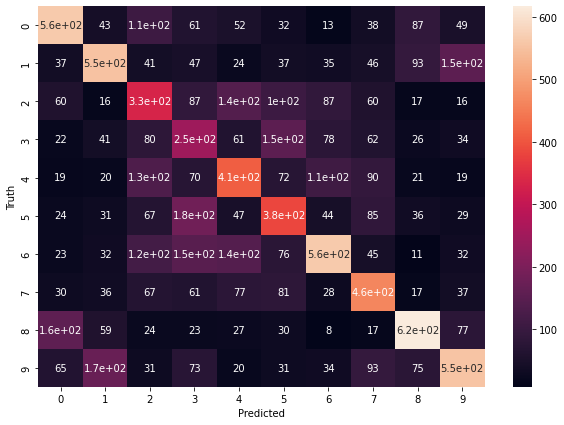

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn=KNeighborsClassifier(n_neighbors=7)

In [60]:
knn.fit(x_train2,y_train)
y_pred_knn=knn.predict(x_test2)
y_pred_knn

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([2, 8, 8, ..., 5, 6, 4], dtype=uint8)

In [61]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45      1299
           1       0.20      0.70      0.30       280
           2       0.44      0.22      0.29      2013
           3       0.20      0.28      0.23       707
           4       0.52      0.23      0.32      2222
           5       0.20      0.40      0.27       504
           6       0.27      0.35      0.30       761
           7       0.20      0.70      0.31       281
           8       0.69      0.39      0.50      1749
           9       0.14      0.73      0.23       184

    accuracy                           0.34     10000
   macro avg       0.34      0.44      0.32     10000
weighted avg       0.45      0.34      0.35     10000



In [62]:
cm=confusion_matrix(y_pred_knn,y_test)
cm

array([[518, 118, 110,  66,  60,  63,  22,  78, 112, 152],
       [  7, 195,   2,   5,   0,   2,   1,   8,  10,  50],
       [118, 124, 437, 243, 268, 225, 271, 185,  47,  95],
       [ 12,  51,  50, 199,  33, 156,  56,  57,  34,  59],
       [ 46, 173, 250, 214, 521, 201, 319, 294,  69, 135],
       [  5,  32,  24, 102,  14, 204,  32,  60,  12,  19],
       [ 30,  55,  65, 108,  44,  80, 265,  48,  14,  52],
       [  5,   8,   7,  11,  11,  10,   1, 196,   7,  25],
       [255, 223,  53,  51,  48,  53,  32,  68, 688, 278],
       [  4,  21,   2,   1,   1,   6,   1,   6,   7, 135]], dtype=int64)

Text(69.0, 0.5, 'Truth')

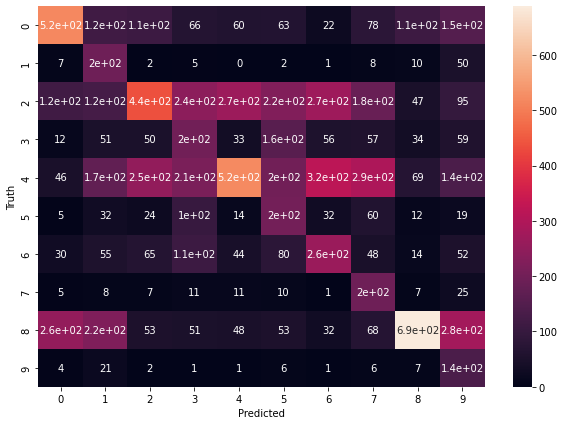

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')